<a href="https://colab.research.google.com/github/np03cs4a240035-commits/colab/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#CELL 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline


In [18]:
#CELL 2
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data = pd.read_csv("/content/drive/MyDrive/w4/diabetes_.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#CELL 3
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [21]:
#CELL 4
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].mean())

data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [22]:
#CELL 5
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

print(X.shape, y.shape)


(768, 8) (768,)


In [23]:
#CELL 6
def train_test_split_scratch(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * (1 - test_size))
    train_idx = indices[:split]
    test_idx = indices[split:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print(X_train.shape, X_test.shape)


(537, 8) (231, 8)


In [24]:
#CELL 7
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [28]:
#CELL 8
def knn_single(x, X_train, y_train, k):
    distances = [euclidean_distance(x, train_x) for train_x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    return np.bincount(k_labels).argmax()
# Predict using kNN
k = 3
y_pred = knn_predict(X_test, X_train, y_train, k)

# Accuracy calculation
accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy with k =", k, ":", accuracy)



Accuracy with k = 3 : 70.12987012987013


In [39]:
# --------- CELL 9: kNN PREDICTION + OUTPUT ---------

k = 3  # you can change this value

y_pred = knn_predict(X_test, X_train, y_train, k)

print("k value:", k)
print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual Labels:", y_test[:10])

accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy (%):", accuracy)


k value: 3
First 10 Predictions: [0 1 0 0 0 0 0 0 1 0]
First 10 Actual Labels: [0 1 0 0 0 0 1 0 0 0]
Accuracy (%): 70.12987012987013


In [40]:
#CELL 10
def compute_accuracy(y_true, y_pred):
    acc = np.mean(y_true == y_pred) * 100
    return acc

print("Accuracy Function Ready ✔")


Accuracy Function Ready ✔


In [41]:
#CELL 11
acc = compute_accuracy(y_test, y_pred)
print("Final Accuracy (%):", acc)


Final Accuracy (%): 70.12987012987013


In [42]:
#CELL 12
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_scaled = standardize(X)

print("Data Standardized ✔")
print("First row (before):", X[0])
print("First row (after): ", X_scaled[0])


Data Standardized ✔
First row (before): [  6.         148.          72.          35.         155.54822335
  33.6          0.627       50.        ]
First row (after):  [ 6.39947260e-01  8.65108070e-01 -3.35182392e-02  6.65502121e-01
 -3.34507888e-16  1.66291742e-01  4.68491977e-01  1.42599540e+00]


In [43]:
#CELL 13
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

print("Scaled Train shape:", X_train_s.shape)
print("Scaled Test shape :", X_test_s.shape)


Scaled Train shape: (537, 8)
Scaled Test shape : (231, 8)


In [44]:
#CELL 14
k = 3
y_pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)

print("Scaled Predictions (first 10):", y_pred_s[:10])
print("Actual Labels (first 10):     ", y_test_s[:10])

acc_s = compute_accuracy(y_test_s, y_pred_s)
print("Scaled Accuracy (%):", acc_s)


Scaled Predictions (first 10): [0 0 0 1 0 0 1 0 0 0]
Actual Labels (first 10):      [0 1 0 0 0 0 1 0 0 0]
Scaled Accuracy (%): 74.45887445887446


In [48]:
#CELL 15
def experiment_k(X_train, y_train, X_test, y_test, k_values):
    acc_list = []
    time_list = []

    for k in k_values:
        start = time.time()
        preds = knn_predict(X_test, X_train, y_train, k)
        end = time.time()

        acc = compute_accuracy(y_test, preds)
        acc_list.append(acc)
        time_list.append(end - start)

        print(f"k={k} | Accuracy={acc:.2f}% | Time={end-start:.4f}s")

    return acc_list, time_list
print("Experiment Ready ✔")


Experiment Ready ✔


In [49]:
#CELL 16
k_values = range(1, 11)

print("---- ORIGINAL DATA ----")
acc_orig, time_orig = experiment_k(
    X_train, y_train, X_test, y_test, k_values
)

print("\n---- SCALED DATA ----")
acc_scaled, time_scaled = experiment_k(
    X_train_s, y_train_s, X_test_s, y_test_s, k_values
)


---- ORIGINAL DATA ----
k=1 | Accuracy=66.67% | Time=0.8456s
k=2 | Accuracy=71.86% | Time=0.8392s
k=3 | Accuracy=70.13% | Time=0.8082s
k=4 | Accuracy=74.03% | Time=0.8190s
k=5 | Accuracy=70.56% | Time=1.2022s
k=6 | Accuracy=73.59% | Time=1.4042s
k=7 | Accuracy=71.43% | Time=1.4152s
k=8 | Accuracy=72.73% | Time=1.0220s
k=9 | Accuracy=72.29% | Time=0.8087s
k=10 | Accuracy=72.29% | Time=0.8189s

---- SCALED DATA ----
k=1 | Accuracy=71.00% | Time=0.8089s
k=2 | Accuracy=71.86% | Time=0.8023s
k=3 | Accuracy=74.46% | Time=0.8564s
k=4 | Accuracy=73.16% | Time=0.8267s
k=5 | Accuracy=75.76% | Time=0.8740s
k=6 | Accuracy=72.73% | Time=1.1174s
k=7 | Accuracy=74.03% | Time=0.8431s
k=8 | Accuracy=74.89% | Time=0.8115s
k=9 | Accuracy=75.32% | Time=0.8019s
k=10 | Accuracy=73.16% | Time=1.3752s


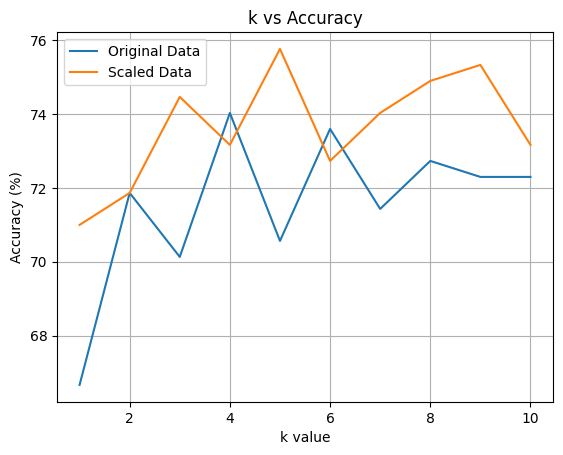

In [50]:
#CELL 17
plt.figure()
plt.plot(k_values, acc_orig, label="Original Data")
plt.plot(k_values, acc_scaled, label="Scaled Data")
plt.xlabel("k value")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()


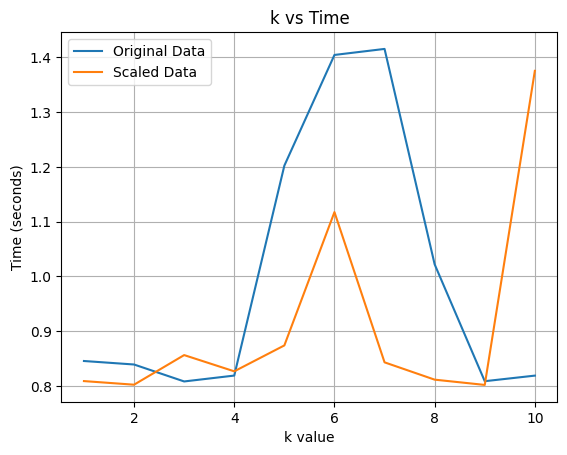

In [51]:
#Cell 18
plt.figure()
plt.plot(k_values, time_orig, label="Original Data")
plt.plot(k_values, time_scaled, label="Scaled Data")
plt.xlabel("k value")
plt.ylabel("Time (seconds)")
plt.title("k vs Time")
plt.legend()
plt.grid()
plt.show()
